In [76]:
%pylab inline
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

Populating the interactive namespace from numpy and matplotlib


In [62]:
dataset = pd.read_excel(r'our_data.xlsx')
dataset

,Time (s),first_rise,second_rise,third_rise,average_rising,first_fall,second_fall,third_fall,average_falling
0,0,0.004,0.004,0.004,0.004000,10.360,10.050,9.880,10.096667
1,1,0.419,0.443,0.441,0.434333,10.210,9.850,9.440,9.833333
2,2,1.978,1.535,1.457,1.656667,9.580,9.220,8.370,9.056667
3,3,4.331,3.992,2.828,3.717000,8.780,7.320,5.870,7.323333
4,4,8.450,5.916,4.714,6.360000,7.980,5.550,4.873,6.134333
...,...,...,...,...,...,...,...,...,...
96,96,10.360,10.050,9.880,10.096667,0.004,0.004,0.004,0.004000
97,97,10.360,10.050,9.880,10.096667,0.004,0.004,0.004,0.004000
98,98,10.360,10.050,9.880,10.096667,0.004,0.004,0.004,0.004000
99,99,10.360,10.050,9.880,10.096667,0.004,0.004,0.004,0.004000


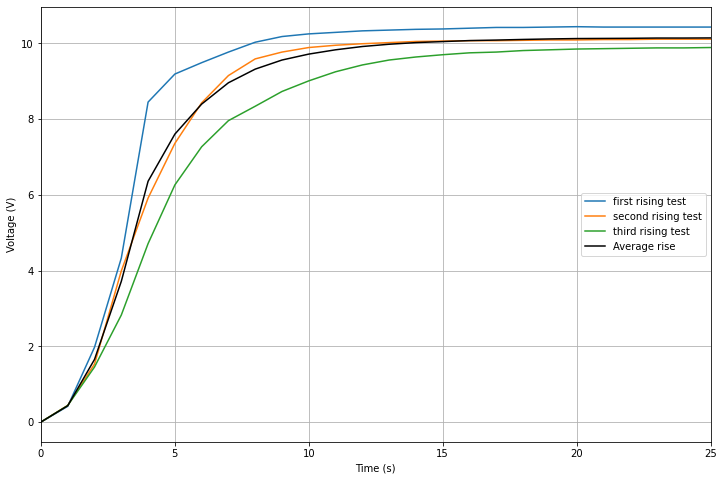

In [63]:
t = dataset['Time (s)']
a = dataset['first_rise']
b = dataset['second_rise']
c = dataset['third_rise']
d = dataset['average_rising']
figure(figsize=(12,8))
plot(t, a, label='first rising test')
plot(t, b, label='second rising test')
plot(t, c, label='third rising test')
plot(t, d, label='Average rise', color='black')
xlim(0,25)
#hline
legend(loc='right')
xlabel('Time (s)')
ylabel('Voltage (V)')
grid()
show()

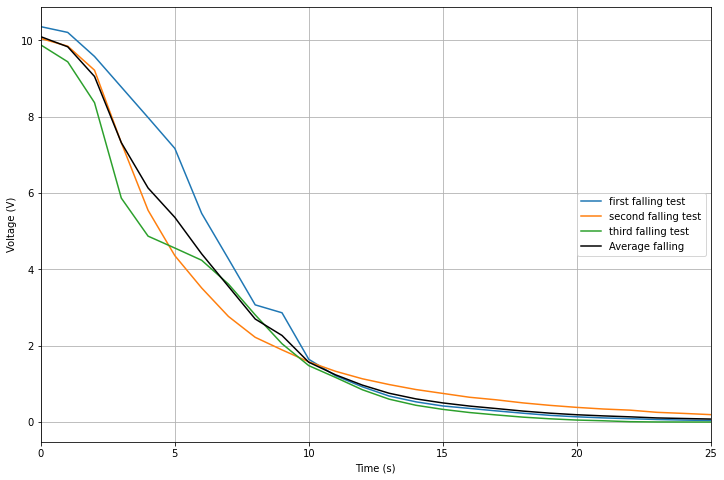

In [64]:
e = dataset['first_fall']
f = dataset['second_fall']
g = dataset['third_fall']
h = dataset['average_falling']
figure(figsize=(12,8))
plot(t, e, label='first falling test')
plot(t, f, label='second falling test')
plot(t, g, label='third falling test')
plot(t, h, label='Average falling', color='black')
#hlines(6, 0, 100, 'red')
xlim(0,25)
#
legend(loc='right')
xlabel('Time (s)')
ylabel('Voltage (V)')
grid()
show()

Voltage at 0 degree Celcius is 0.004V and consistent throughout all tests <br>
Voltage at 100 degrees Celcius varies with each of the tests as the hot water slowly cools down. <br>
The three values of peak voltages used in calculations below are 10.36, 10.05, 9.88 <br>
We can see that the first reading was the highest, as the water was the hottest. 
The ΔV is calculated as ** ΔV = (Vc - Vo) ** <br>
Voltage read at time TAU is calculated as ** [ V(tau) = Vo + (1-1/e) * ΔV ] ** <br>

In [73]:
# rising test

# Voltages read at time 'tau' for rising tests
VR1 = 0.004 + 0.632 * (10.36 - 0.004)
VR2 = 0.004 + 0.632 * (10.05 - 0.004)
VR3 = 0.004 + 0.632 * (9.88 - 0.004)
# Evaluating time (TAU) at those voltages
Tau1 = round(np.interp(V631, a, t), 3) 
Tau2 = round(np.interp(V632, b, t), 3)
Tau3 = round(np.interp(V633, c, t), 3)
print('\nThe time constants for the tests are', Tau1,',', Tau2,'and', Tau3, 'respectively\n')


The time constants for the tests are 3.538 , 4.303 and 4.989 respectively



In [72]:
# falling test

# Voltages read at time 'tau' for falling tests
VF1 = 10.36 + 0.37 * (0.004 - 10.36)
VF2 = 10.05 + 0.37 * (0.004 - 10.05)
VF3 = 9.88 + 0.37 * (0.004 - 9.88)

# Evaluating time (TAU) at those voltages
Tau4 = round(np.interp(-V1, -e, t), 3)
Tau5 = round(np.interp(-V2, -f, t), 3)
Tau6 = round(np.interp(-V3, -g, t), 3)
print('\nThe time constants for the tests are',Tau4,',', Tau5,'and', Tau6, 'respectively\n')


The time constants for the tests are 5.377 , 3.558 and 2.858 respectively



In [71]:
R = [Tau1, Tau2, Tau3] #rising time constants
F = [Tau4, Tau5, Tau6] #falling time constants
CI = 0.95 #confidence Interval
alpha = 1-CI
stat, p = ttest_ind(R, F)
print('stat = %.3f, p = %.3f\n' % (stat, p))
if p > alpha:
    print('Sakari is happy :)')
else:
    print('Sakari is NOT happy :(')

stat = 0.402, p = 0.708

Sakari is happy :)
